#Veri Setini Yükleme

In [45]:
import nltk
from nltk.corpus import twitter_samples

In [46]:
from nltk.corpus import stopwords

In [47]:
nltk.download('twitter_samples')

[nltk_data] Downloading package twitter_samples to /root/nltk_data...
[nltk_data]   Package twitter_samples is already up-to-date!


True

In [48]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [49]:
from nltk.tokenize import TweetTokenizer

In [50]:
from nltk.stem import PorterStemmer

In [51]:
import re
import pandas as pd

In [52]:
negative_tweets = twitter_samples.strings("negative_tweets.json")
df_neg = pd.DataFrame(negative_tweets, columns = ['text'])
df_neg['label'] = 0

In [53]:
positive_tweets = twitter_samples.strings("positive_tweets.json")
df_pos = pd.DataFrame(positive_tweets, columns = ['text'])
df_pos['label'] = 1

In [54]:
df = pd.concat([df_neg, df_pos])
df = df.sample(frac=1).reset_index(drop=True)

In [55]:
df.head(10)

,text,label
0,"Its already afternoon, lets read Al Kahfi befo...",1
1,@svthoshipit typo ye :(,0
2,Why does it have to rain :(,0
3,@crybassist why have people unfaved and rted t...,0
4,New bio. Bodo amat :-(,0
5,@sophieb666 I couldn't agree more :-),1
6,@Smit_Meister @scotchism So this is debatable :),1
7,@DrewJPS accepted. :),1
8,@TarekTamo @NourH92 hahahahaha law I can make ...,1
9,Hi BAM ! @BarsAndMelody \nCan you follow my be...,1


#Metinleri Ön İşleme

In [56]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
import re

In [57]:
#Metin temizleme
def clean_text(text):
  text = re.sub(r'http\S+', '', text) #URL'leri kaldır
  text = re.sub(r'\@\w+|\#', '', text) #Kullanıcı adlarını ve hastagleri kaldır
  text = re.sub(r'[^\w\s]', '', text) #Özel karakterleri kaldır
  return text

In [58]:
#Metni küçük harfe dönüştürme
def lowercase(text):
  return text.lower()

In [59]:
#Tokenization
def tokenize(text):
  return word_tokenize(text)

In [60]:
#Stopwords Temizleme
def remove_stopwords(tokens):
  stopwords_english = set(stopwords.words('english'))
  return [word for word in tokens if word not in stopwords_english]

In [61]:
#Stemming
def stem(tokens):
  stemmer = PorterStemmer()
  return [stemmer.stem(word) for word in tokens]

In [62]:
#Tüm veri ön işleme adımlarını uygula
def preprocess(text):
  text = clean_text(text)
  text = lowercase(text)
  tokens = tokenize(text)
  tokens = remove_stopwords(tokens)
  tokens = stem(tokens)
  return ' '.join(tokens) #Token'ları birleştirerek temizlenmiş metni oluşturma

In [63]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [64]:
#Ön işleme adımlarını tüm DataFrame'e uygulama
df['text_cleaned'] = df['text'].apply(preprocess)

In [65]:
df.head()

,text,label,text_cleaned
0,"Its already afternoon, lets read Al Kahfi befo...",1,alreadi afternoon let read al kahfi day finish
1,@svthoshipit typo ye :(,0,typo ye
2,Why does it have to rain :(,0,rain
3,@crybassist why have people unfaved and rted t...,0,peopl unfav rted
4,New bio. Bodo amat :-(,0,new bio bodo amat


#Kelime Bulutu

In [67]:
from nltk.probability import FreqDist
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import re

In [68]:
word = FreqDist(df['text_cleaned'])
wordcloud = WordCloud(width=400, height=200, background_color='white').generate_from_frequencies(word)

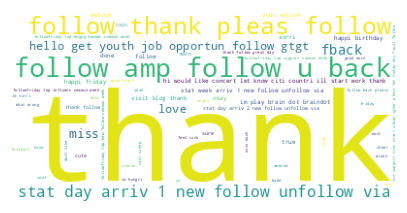

In [69]:
plt.figure(figsize=(5,3))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

kelime bulutunun amacı kelimenin sıklığını görmek için veri analizi yapmak.

#Öznitelik Çıkarımı

##Tf Idf

In [70]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=10000)
tfidf_matrix = vectorizer.fit_transform(df['text_cleaned'])
feature_names = vectorizer.get_feature_names_out()
print("td Idf matris: ", tfidf_matrix.shape)

td Idf matris:  (10000, 10000)


#Model Eğitimi

In [71]:
from sklearn.model_selection import train_test_split

In [72]:
X_train, X_test, y_train, y_text = train_test_split(tfidf_matrix, df['label'], test_size = 0.2, random_state=42)

##KNN

Sınıflandırma ve regresyon algoritmasıdır. Sınıflandırma için kullanıldığında, bir örneğin sınıfını belirlemek için komşularının sınıflarına bakar ve en yaygın olan sınıfı tahmin eder. Regresyon için kullanıldığında ise, bir örneğin çıktısını belirlemek için komşuların çıktılarına bakar ve bu çıktıların ortalamasını kullanır.

In [73]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

###knn = 5

In [74]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [75]:
print("knn sonuçları\n")
print("Accuracy (Doğruluk): " ,accuracy_score(y_text, y_pred))
print("F1: " ,f1_score(y_text, y_pred))
print("Recall (Hassasiyet): " ,recall_score(y_text, y_pred))
print("Precision (Kesinlik): " ,precision_score(y_text, y_pred))

knn sonuçları

Accuracy (Doğruluk):  0.5985
F1:  0.37019607843137253
Recall (Hassasiyet):  0.233201581027668
Precision (Kesinlik):  0.8973384030418251


##Random Forest

Random Forest, sınıflandırma ve regresyon problemleri için kullanılan ML algoritmasıdır. Temelde birden fazla karar ağacı bir araya getirilerek güçlü ve kararlı bir model oluştururuz.

In [76]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=150)
clf.fit(X_train, y_train)
y_pred_clf = clf.predict(X_test)

In [77]:
print("Random Forest sonuçları\n")
print("Accuracy (Doğruluk): " ,accuracy_score(y_text, y_pred_clf))
print("F1: " ,f1_score(y_text, y_pred_clf))
print("Recall (Hassasiyet): " ,recall_score(y_text, y_pred_clf))
print("Precision (Kesinlik): " ,precision_score(y_text, y_pred_clf))

Random Forest sonuçları

Accuracy (Doğruluk):  0.7445
F1:  0.726005361930295
Recall (Hassasiyet):  0.6689723320158103
Precision (Kesinlik):  0.7936694021101993


##Logistic Regresyon

In [78]:
from sklearn.linear_model import LogisticRegression
reg = LogisticRegression()
reg.fit(X_train, y_train)
y_pred_reg = reg.predict(X_test)

In [79]:
print("Logistic Regresyon sonuçları\n")
print("Accuracy (Doğruluk): " ,accuracy_score(y_text, y_pred_reg))
print("F1: " ,f1_score(y_text, y_pred_reg))
print("Recall (Hassasiyet): " ,recall_score(y_text, y_pred_reg))
print("Precision (Kesinlik): " ,precision_score(y_text, y_pred_reg))

Logistic Regresyon sonuçları

Accuracy (Doğruluk):  0.7625
F1:  0.7599797877716018
Recall (Hassasiyet):  0.7430830039525692
Precision (Kesinlik):  0.7776628748707343


##SVM

In [80]:
from sklearn.svm import SVC
svm = SVC(kernel = 'linear')
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

In [81]:
print("SVM sonuçları\n")
print("Accuracy (Doğruluk): " ,accuracy_score(y_text, y_pred_svm))
print("F1: " ,f1_score(y_text, y_pred_svm))
print("Recall (Hassasiyet): " ,recall_score(y_text, y_pred_svm))
print("Precision (Kesinlik): " ,precision_score(y_text, y_pred_svm))

SVM sonuçları

Accuracy (Doğruluk):  0.757
F1:  0.7560240963855421
Recall (Hassasiyet):  0.7440711462450593
Precision (Kesinlik):  0.7683673469387755


#Confussion Matrix

In [82]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

knn

<Axes: >

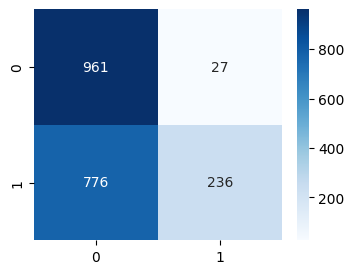

In [83]:
cm = confusion_matrix(y_text, y_pred)
plt.figure(figsize = (4,3))
sns.heatmap(cm, annot = True, fmt = 'd', cmap = 'Blues')

random forest

<Axes: >

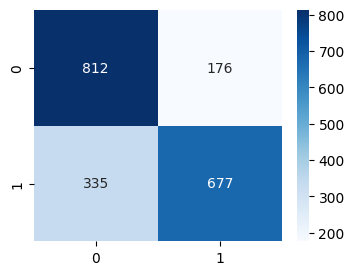

In [84]:
cm = confusion_matrix(y_text, y_pred_clf)
plt.figure(figsize = (4,3))
sns.heatmap(cm, annot = True, fmt = 'd', cmap = 'Blues')

logistic regression

<Axes: >

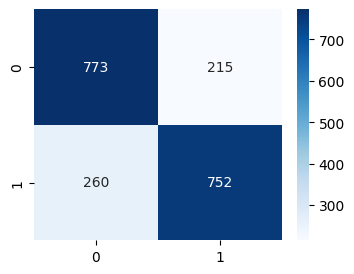

In [85]:
cm = confusion_matrix(y_text, y_pred_reg)
plt.figure(figsize = (4,3))
sns.heatmap(cm, annot = True, fmt = 'd', cmap = 'Blues')

svm

<Axes: >

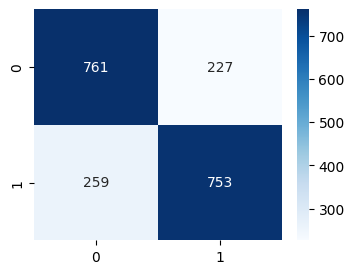

In [86]:
cm = confusion_matrix(y_text, y_pred_svm)
plt.figure(figsize = (4,3))
sns.heatmap(cm, annot = True, fmt = 'd', cmap = 'Blues')